# Categorical Data

## Types of Categorical Data

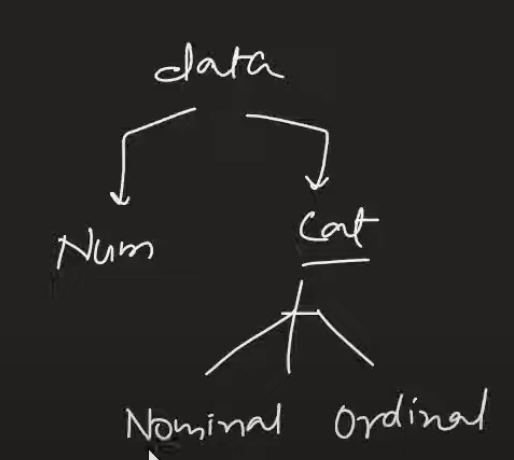

**Nominal Data**: In Norminal data, there is no order like state names. That is there is no value assign to it. We cannot say that the value of maharastra is more than west bengal. The value of all the states are equal

**Ordinal Data**: There is order in the data like grades HD, D. We know that HD is better than D.

# Why do we need encoding?
Generally categorical data is in string, but all machine learning algorithm expects the dataset to be in number. Thats the main reason why we need to perform encoding to the categorical data.
- **Nominal Data** : One hot encoding
- **Ordinal Data** : Ordinal encoding 
- Label Encoding

# Label Encoding VS Ordinal Encoding

- **X** : This Input variable , when we have ordinal categorical data in the X part of the dataset , we perform ordinal encoding.
- **Y** : This Target Variable, when we have  categorical data in the Y part of the dataset, We perform label encoding. There is seperate class to perform that which is label encoder.
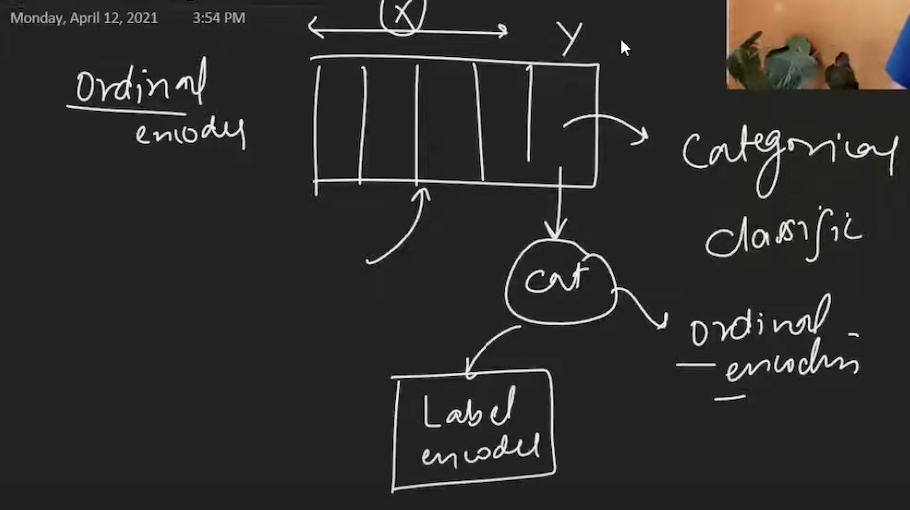

## 1. Ordinal Encoding

There is column name Education in the data set.
- **HS** : High School
- **UG** : Under Graduate
- **PG** : Post Graduate
It is evident that we have oridnal data in the dataset. It is clear that PG>UG>HS. We need to perform ordinal encoding.
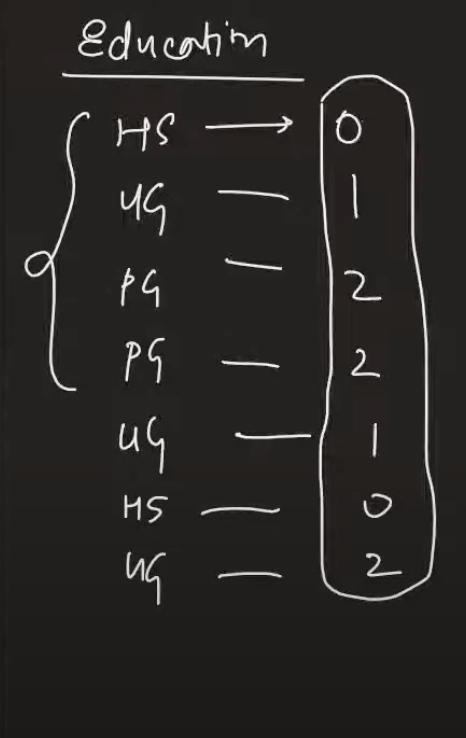

In [1]:
# Importing library
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("customer.csv")

In [7]:
df.sample(5)

,age,gender,review,education,purchased
0,30,Female,Average,School,No
40,39,Male,Good,School,No
47,38,Female,Good,PG,Yes
41,23,Male,Good,PG,Yes
24,16,Female,Average,PG,Yes


- **Gender, purchased** : Nominal 
- **Education, purchased** : Ordinal


Encoding method
- **Education, purchased** : Ordinal encoding
- **Gender** :One hot encoding
- **purchased** : Label Encoding 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,2:4], 
                                                   df['purchased'],
                                                   random_state = 0,
                                                   test_size = 0.2)

In [9]:
X_train

,review,education
33,Good,PG
35,Poor,School
26,Poor,PG
34,Average,School
18,Good,School
7,Poor,School
14,Poor,PG
45,Poor,PG
48,Good,UG
29,Average,UG


The object created with encoder should have a parameter which is list of list. The list should be in ascending order of the values, AS seen below we have poor lowest and good the highest values. Similary for School which is lowest and PG for highest.
If there was not paramter pass to it, it will automatcially assign ordinal values to it. 
So passing the list in correct order is very important.

In [10]:
from sklearn.preprocessing import OrdinalEncoder

oe =  OrdinalEncoder(categories = [["Poor", 'Average', 'Good'], ['School', 'UG', 'PG']])
oe.fit(X_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [11]:
X_train = oe.transform(X_train)
X_test = oe.transform(X_test)

In [12]:
X_train

array([[2., 2.],
       [0., 0.],
       [0., 2.],
       [1., 0.],
       [2., 0.],
       [0., 0.],
       [0., 2.],
       [0., 2.],
       [2., 1.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [2., 2.],
       [1., 0.],
       [0., 2.],
       [1., 1.],
       [1., 0.],
       [2., 0.],
       [1., 0.],
       [0., 1.],
       [2., 0.],
       [2., 1.],
       [0., 1.],
       [0., 0.],
       [1., 2.],
       [1., 2.],
       [2., 0.],
       [2., 0.],
       [2., 1.],
       [1., 2.],
       [0., 2.],
       [2., 1.],
       [0., 2.],
       [0., 2.],
       [2., 2.],
       [1., 0.],
       [2., 2.],
       [1., 1.]])

In [13]:
# attributes
oe.categories_

[array(['Poor', 'Average', 'Good'], dtype=object),
 array(['School', 'UG', 'PG'], dtype=object)]

## 2. Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y_train)

LabelEncoder()

In [16]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [17]:
# classes
le.classes_

array(['No', 'Yes'], dtype=object)

## 3. One-Hot Encoding

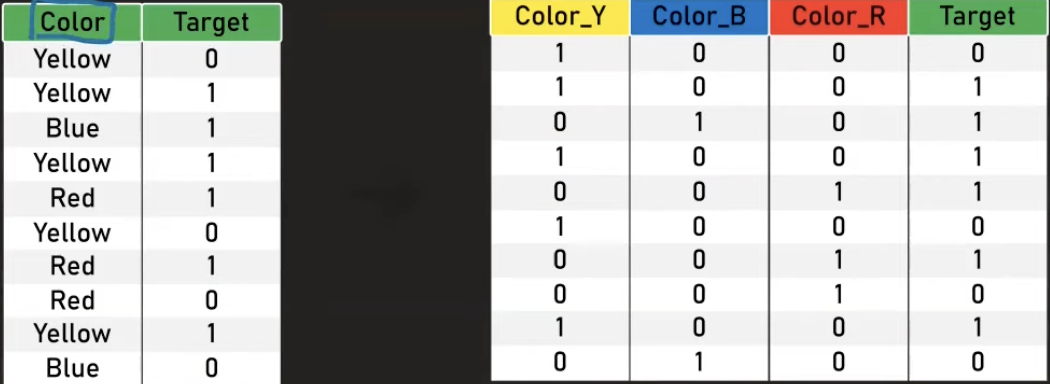

### Dummy Variable Trap

If we have n columns, we will keep only n-1 columns.

**Multicollinearilty** : The input columns should be independent of each other that means that there should be no mathematcial relationship between the any input columns. 

If we see on the above tabular data, the sum of all the columns is equal to 1. This is very problematic when we are working with linear model. 

So in order to resolve the above issue we take n-1 columns, Now there is no mathmatical relation and the issue of multicolinearity is resolved.  for example

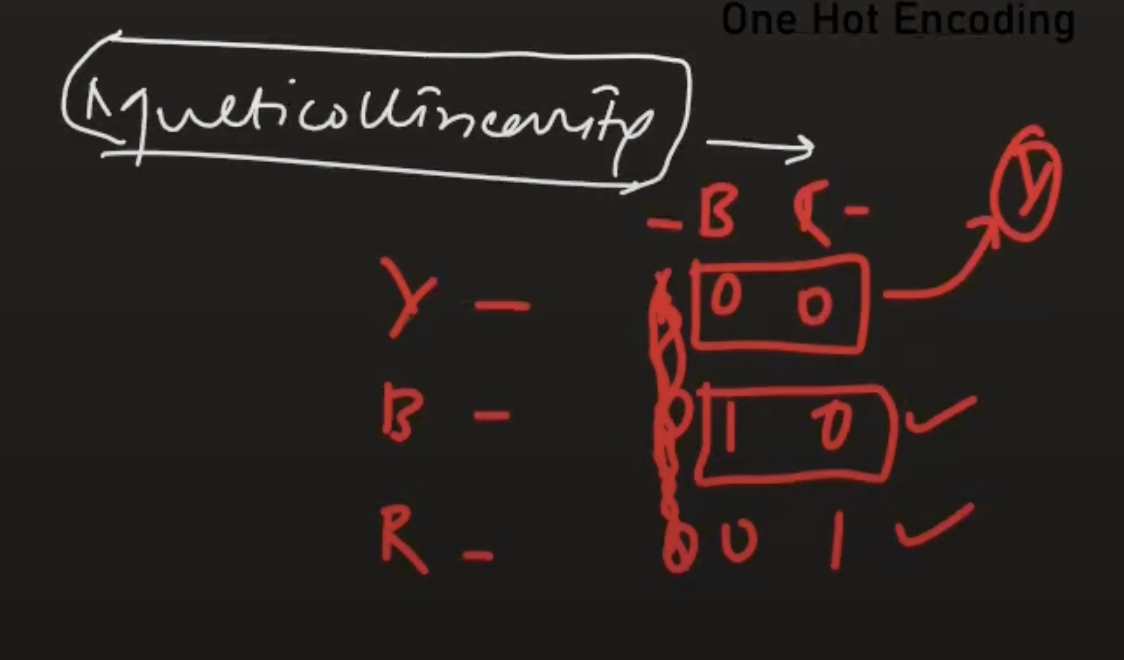

If we see we actually dont need any extra column to represent the yellow color row.

So the extra column which we are removing is called dummy variable and the problem of multi-colinearity created is called dummmy variable trap.

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv("cars.csv")
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [4]:
df['brand'].value_counts()

brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

If we see, we have lot many brands in the dataset. 

In [5]:
df['brand'].nunique()

32

In [6]:
df['fuel'].value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

In [7]:
df['owner'].value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

In [8]:
df.shape

(8128, 5)

### A. OneHotEncoding using Pandas

In [12]:
df1 = pd.get_dummies(df, columns = ['fuel', 'owner'])

4 columns for fuel, 5 columns for owner and fuel and owner itself column will be removed.

In [13]:
df1.shape

(8128, 12)

### B. K-1 Encoding

In [14]:
# Dropping first column in order to discard multicolinearity in the dataset.
df2 = pd.get_dummies(df, columns = ['fuel', 'owner'], drop_first = True)
df2.shape

(8128, 10)

But we dont use pandas in the machine learning algorithm, because pandas dont remember the order of onehotEncoding.Everytime you do, it does it differently. But sklearn library remembers how oneHotencoding was performed. Thats why we use sklearn class.

### C. OneHotEncoding using Sklearn

#### Spliting Train and Test Data

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("selling_price", axis = 1),
                                                            df['selling_price'],
                                                              test_size = 0.2,
                                                              random_state = 0)

In [21]:
X_train

,brand,km_driven,fuel,owner
3042,Hyundai,60000,LPG,First Owner
1520,Tata,150000,Diesel,Third Owner
2611,Hyundai,110000,Diesel,Second Owner
3544,Mahindra,28000,Diesel,Second Owner
4138,Maruti,15000,Petrol,First Owner
...,...,...,...,...
4931,Tata,70000,Diesel,Third Owner
3264,Ford,100000,Diesel,Second Owner
1653,Hyundai,90000,Petrol,Second Owner
2607,Volkswagen,90000,Diesel,First Owner


In [23]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
ohe = OneHotEncoder()



In [29]:
ohe.fit(X_train[['fuel', 'owner']])

OneHotEncoder()

In [30]:
# The transformation is done to sparse matrix, So need to use toarray to change it to array.
X_train_new = ohe.transform(X_train[['fuel', 'owner']]).toarray()
X_test_new = ohe.transform(X_test[['fuel', 'owner']]).toarray()

In [34]:
pd.DataFrame(X_train_new)

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6497,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6498,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6499,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [32]:
pd.DataFrame(X_train_new).shape

(6502, 9)

In [33]:
pd.concat([X_train[['brand', 'km_driven']], pd.DataFrame(X_train_new)], axis=1)

,brand,km_driven,0,1,2,3,4,5,6,7,8
3042,Hyundai,60000.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1520,Tata,150000.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2611,Hyundai,110000.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3544,Mahindra,28000.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4138,Maruti,15000.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6472,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6476,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6486,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6495,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


#### The Second way

In [47]:
# This is to remove multi-collinearity
# if we keep sparse = False then it wont generate matrix and then there is no need to to_array
# dtype=np.int32 This is to convert numpy result into integer.
ohe = OneHotEncoder(drop='first',sparse=False,dtype=np.int32)

In [48]:
X_train_new = ohe.fit_transform(X_train[['fuel','owner']])

/Users/vinaymittal/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [49]:
X_test_new = ohe.transform(X_test[['fuel','owner']])

In [50]:
X_test_new.shape

(1626, 7)

In [46]:
# X_train[['brand','km_driven']].values (This is to convert into array)
np.hstack((X_train[['brand','km_driven']].values,X_train_new)).shape

(6502, 9)

# 4. OneHotEncoding with Top Categories

In [9]:
counts = df['brand'].value_counts()

As we have lot many brands in the dataset, We have clubbed the brands which have less frequency. The clubbed categories will be others. The threshold which we set is 100.

In [12]:
threshold = 100

In [15]:
repl = counts[counts <= 100].index

In [18]:
pd.get_dummies(df['brand'].replace(repl, 'uncommon')).astype(int)

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0,0,0,0,1,0,0,0,0,0,0,0,0
8124,0,0,0,0,1,0,0,0,0,0,0,0,0
8125,0,0,0,0,0,0,1,0,0,0,0,0,0
8126,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
! git 